<b> For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

<b> Scenario

<b>You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

# ROUND 1 (Tuesday)

## Importing libraries

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, mean_absolute_error, mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [168]:
# read data
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type

In [153]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Convert TotalCharges column into numeric type using pd.to_numeric function.

In [154]:
churnData["TotalCharges"]=churnData[["TotalCharges"]].apply(pd.to_numeric, errors="coerce").fillna(0)

In [155]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


## Check for null values in the dataframe. Replace the null values

In [156]:
churnData.isnull().sum().sum()

0

<B> Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [157]:
X = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y=churnData["Churn"]

In [158]:
churnData2 = churnData[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

churnData2


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [159]:
churnData2['Churn']=churnData2['Churn'].replace(['Yes', 'No'], [0,1])
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,1
1,0,34,56.95,1889.50,1
2,0,2,53.85,108.15,0
3,0,45,42.30,1840.75,1
4,0,2,70.70,151.65,0
...,...,...,...,...,...
7038,0,24,84.80,1990.50,1
7039,0,72,103.20,7362.90,1
7040,0,11,29.60,346.45,1
7041,1,4,74.40,306.60,0


In [176]:
#Define the target variable before de scale
X=churnData2.drop('Churn', axis=1)
y=churnData2.Churn

## Scale the features either by using normalizer or a standard scaler

In [170]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992611
1,-0.439916,0.066327,-0.259629,-0.172165
2,-0.439916,-1.236724,-0.362660,-0.958066
3,-0.439916,0.514251,-0.746535,-0.193672
4,-0.439916,-1.236724,0.197365,-0.938874
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.127605
7039,-0.439916,1.613701,1.277533,2.242606
7040,-0.439916,-0.870241,-1.168632,-0.852932
7041,2.273159,-1.155283,0.320338,-0.870513


## Split the data into a training set and a test set

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

## Fit a Knn Classifier (NOT KnnRegressor please!) model on the training data

,Error_metric,Train,Test
0,Accuracy,0.835700,0.763370
1,Precision,0.857251,0.804921
2,Recall,0.932287,0.891629


Confusion matrix for the train set
[[ 733  564]
 [ 246 3387]]


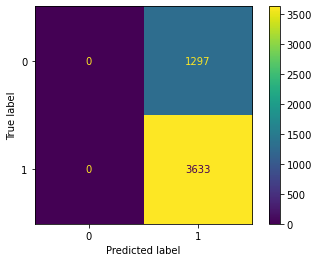



Confusion matrix for the test set
[[ 239  333]
 [ 167 1374]]


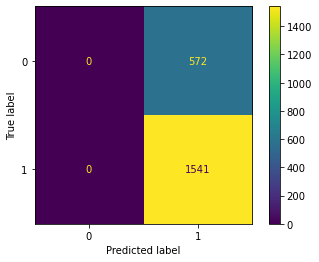

In [177]:
log_model = KNeighborsClassifier() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()


# ROUND 2 (Wednesday)

## Fit a Decision Tree Classifier on the training data


In [178]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


,Error_metric,Train,Test
0,Accuracy,0.79,0.79
1,Precision,0.83,0.82
2,Recall,0.91,0.91


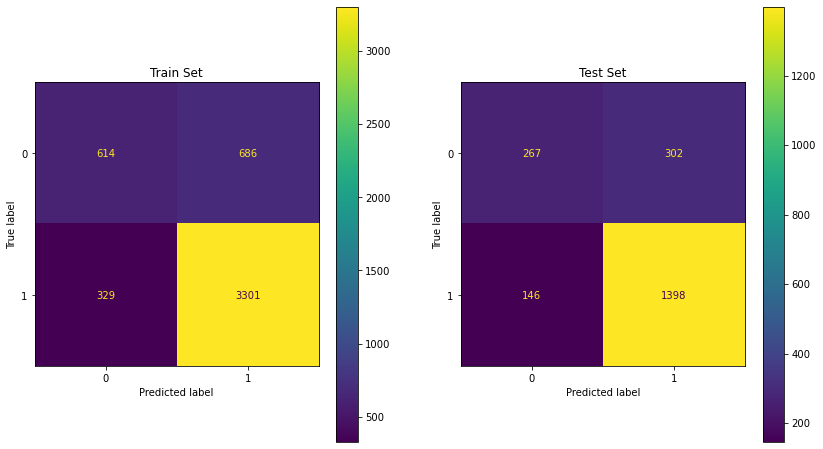

In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [202]:
X_train.shape

(4930, 4)

<BarContainer object of 4 artists>

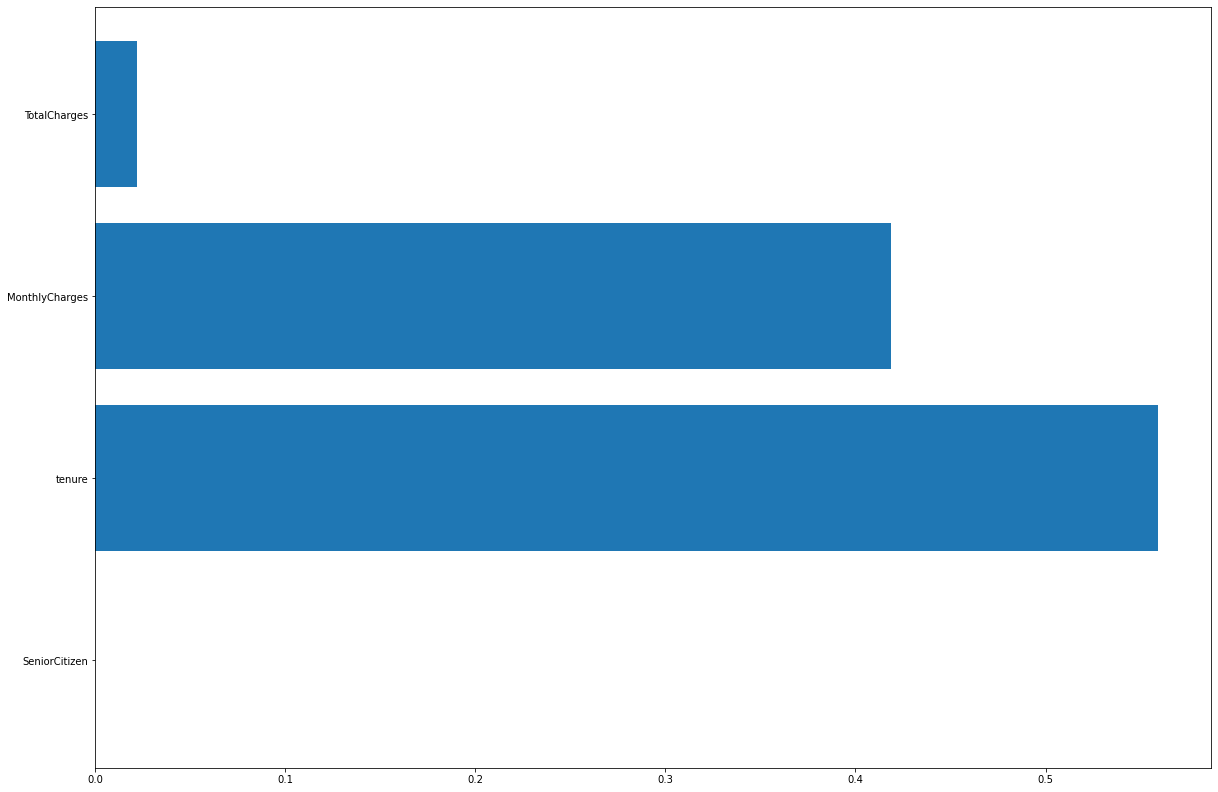

In [203]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

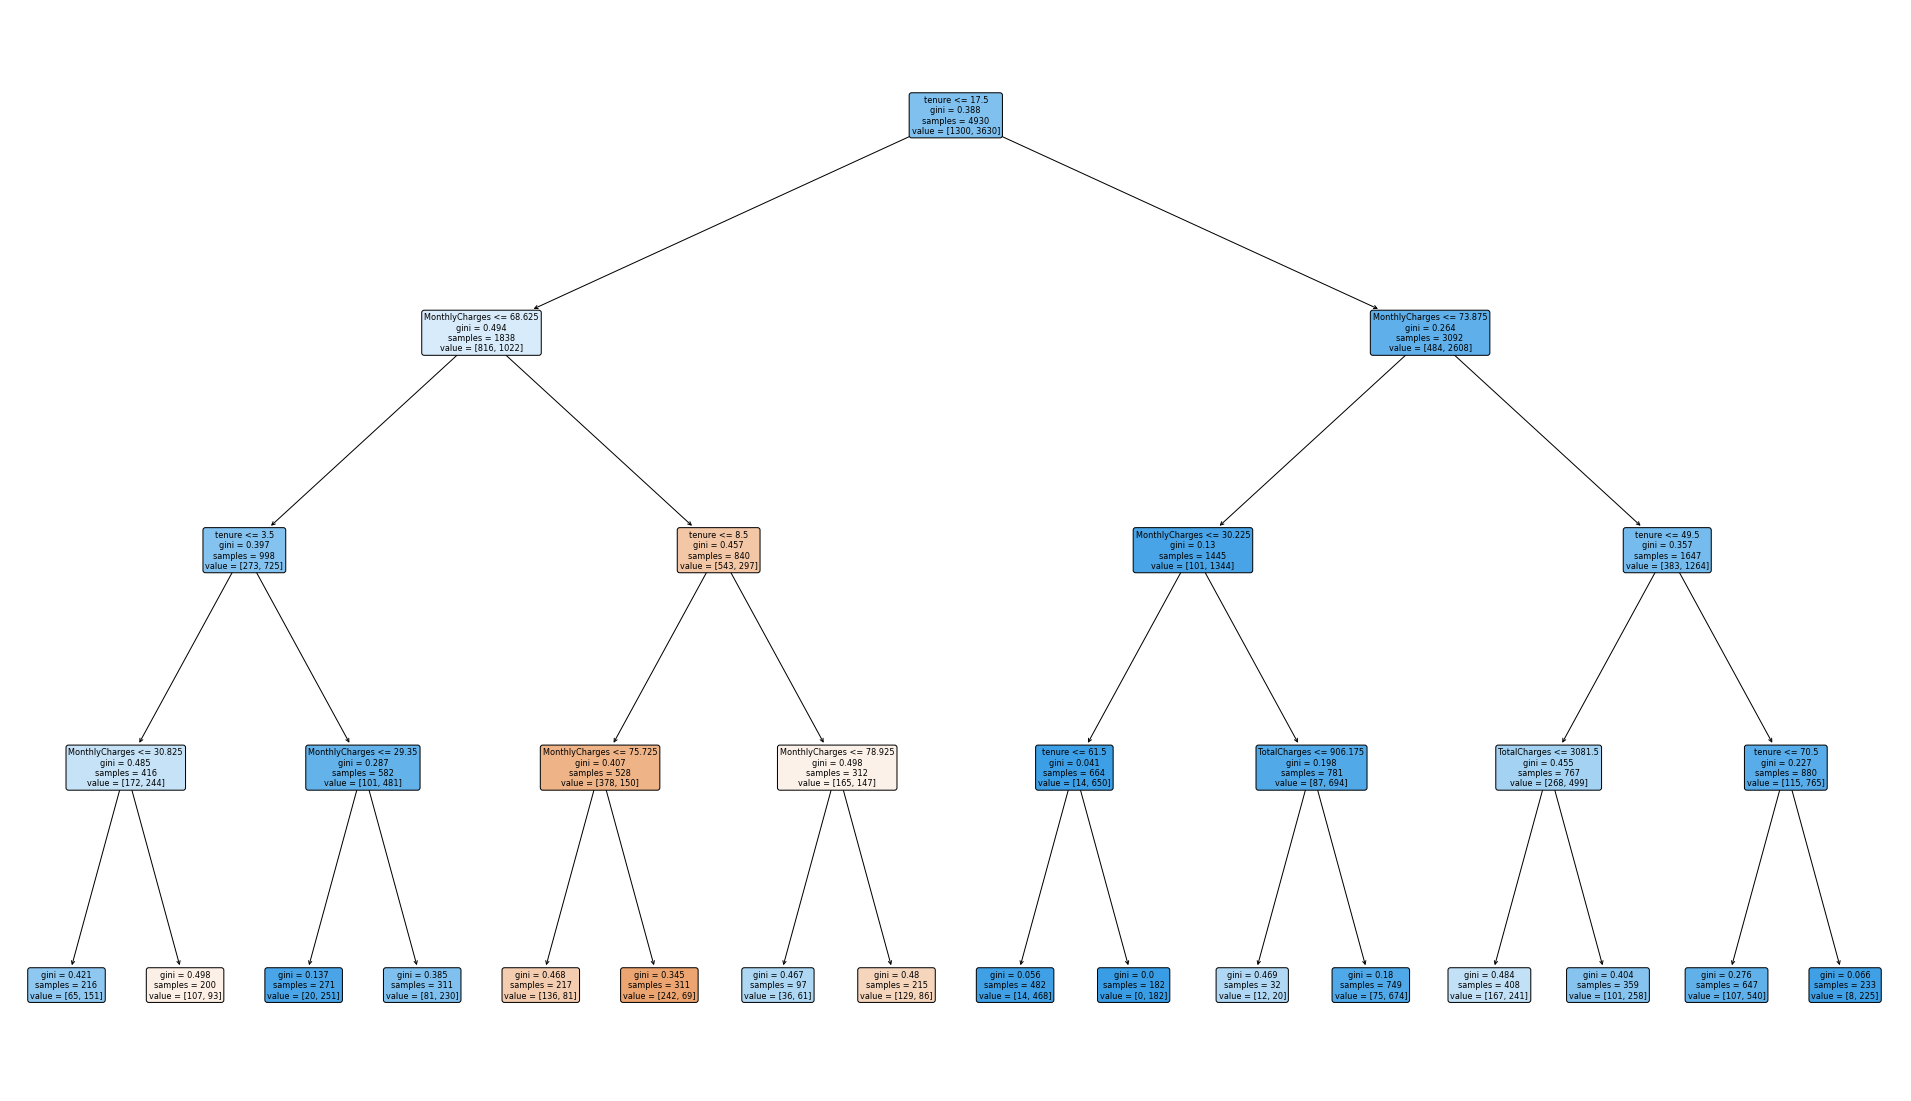

In [204]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [205]:
def performance_model(y_train, y_test, y_pred_train_dt, y_pred_test_dt):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train_dt)
    ME_test  = np.mean(y_test-y_pred_test_dt)

    MAE_train = mean_absolute_error(y_train,y_pred_train_dt)
    MAE_test  = mean_absolute_error(y_test,y_pred_test_dt)

    MSE_train = mean_squared_error(y_train,y_pred_train_dt)
    MSE_test  = mean_squared_error(y_test,y_pred_test_dt)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train_dt) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test_dt) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train_dt)
    R2_test  = r2_score(y_test,y_pred_test_dt)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train_dt})
    df_test  = pd.DataFrame({'Real_value': y_test,  'Predicted_value': y_pred_test_dt})

    return performance, df_train, df_test

## Check the accuracy on the test data

performance, _ ,_ = performance_model(y_train, y_test, y_pred_train_dt, y_pred_test_dt)
performance

# Round 3 (Thursday) Apply K-fold

## Importing libraries

In [271]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#The objective is to provide a confidence interval for the performance 
#of our model using K-fold cross validation

In [210]:
churnData2.shape

(7043, 5)

In [222]:
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,1
1,0,34,56.95,1889.50,1
2,0,2,53.85,108.15,0
3,0,45,42.30,1840.75,1
4,0,2,70.70,151.65,0
...,...,...,...,...,...
7038,0,24,84.80,1990.50,1
7039,0,72,103.20,7362.90,1
7040,0,11,29.60,346.45,1
7041,1,4,74.40,306.60,0


In [223]:
#For it we need check if the values of the 'Churn' feature are balanced
churnData2['Churn'].value_counts()

1    5174
0    1869
Name: Churn, dtype: int64

In [224]:
# As we can see there is a huge imbalance in the data in the representation
# of the two categories. Category 0 is represented 5174 times and category 1 is represented 1869 times.

## Let's try downsampling and upsampling to create a balance between the two classes

### Downsampling

In [232]:
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,1
1,0,34,56.95,1889.50,1
2,0,2,53.85,108.15,0
3,0,45,42.30,1840.75,1
4,0,2,70.70,151.65,0
...,...,...,...,...,...
7038,0,24,84.80,1990.50,1
7039,0,72,103.20,7362.90,1
7040,0,11,29.60,346.45,1
7041,1,4,74.40,306.60,0


In [243]:
category_0 = churnData2[churnData2['Churn'] == 0]
category_1 = churnData2[churnData2['Churn'] == 1]

In [244]:
print(category_0.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [245]:
print(category_0.shape)


(1869, 5)


In [246]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [247]:
churnData2 = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
churnData2 = churnData2.sample(frac=1)
churnData2['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [248]:
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
1012,0,9,95.90,827.45,1
7007,1,72,63.10,4685.55,1
4465,0,31,50.05,1523.40,1
333,0,7,73.85,511.25,0
1923,0,37,19.80,726.10,1
...,...,...,...,...,...
2234,0,23,59.70,1414.20,1
3349,0,11,99.50,1056.95,0
6385,0,4,101.70,364.55,0
327,1,2,70.35,139.05,0


### Upsampling Method 1

In [268]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(1869, 5)


In [250]:
category_1_up

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
634,0,40,54.55,2236.20,1
6705,0,22,51.10,1232.90,1
1356,0,9,75.20,633.85,1
5094,0,65,89.85,5844.65,1
6709,0,50,99.40,5059.75,1
...,...,...,...,...,...
5204,1,38,24.85,955.75,1
7030,0,2,20.05,39.25,1
4717,0,38,110.70,4428.60,1
643,1,49,89.85,4287.20,1


In [251]:
category_1_up.shape

(1869, 5)

In [252]:
churnData3 = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
churnData3 = churnData3.sample(frac=1)
churnData3['Churn'].value_counts()
churnData3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
1176,0,6,109.90,669.45,0
850,0,72,115.80,8476.50,1
2344,1,14,39.70,692.35,1
5569,1,3,83.90,267.40,0
2744,0,42,99.00,4135.00,1
...,...,...,...,...,...
1359,0,9,94.75,889.90,0
1877,0,72,88.55,6362.35,1
2779,0,9,85.35,758.60,0
7037,0,72,21.15,1419.40,1


In [253]:
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
1012,0,9,95.90,827.45,1
7007,1,72,63.10,4685.55,1
4465,0,31,50.05,1523.40,1
333,0,7,73.85,511.25,0
1923,0,37,19.80,726.10,1
...,...,...,...,...,...
2234,0,23,59.70,1414.20,1
3349,0,11,99.50,1056.95,0
6385,0,4,101.70,364.55,0
327,1,2,70.35,139.05,0


In [255]:
#churnData3.drop(['Unnamed: 0'], axis = 1, inplace = True) 
#churnData3

## Cross Validation applying K-fold

### ChurnData2 (Downsampling)

In [256]:
#Define the target variable before de scale
X=churnData2.drop('Churn', axis=1)
y=churnData2.Churn

#Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### Fit a Decision Tree Classifier on the training data

,Error_metric,Train,Test
0,Accuracy,0.73,0.72
1,Precision,0.77,0.76
2,Recall,0.64,0.63


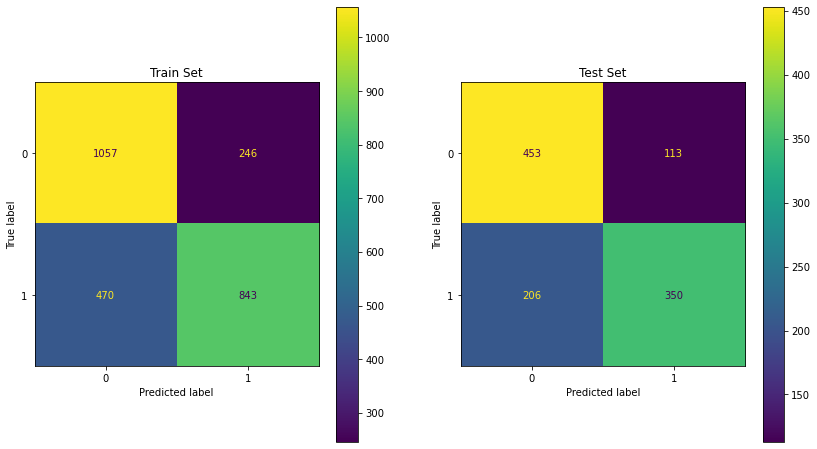

In [257]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [258]:
#After de downsampling we see an improvement in Accuracy, Precision and Recall
#0	Accuracy	0.791684	0.766209
#1	Precision	0.656716	0.633333
#2	Recall	0.412823	0.38644

In [259]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.76335878, 0.70172084, 0.68833652, 0.70172084, 0.72275335])

## ChurnData3 (Upsampling)

In [260]:
#Define the target variable before de scale
X=churnData3.drop('Churn', axis=1)
y=churnData3.Churn

#Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [261]:
churnData3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
1176,0,6,109.90,669.45,0
850,0,72,115.80,8476.50,1
2344,1,14,39.70,692.35,1
5569,1,3,83.90,267.40,0
2744,0,42,99.00,4135.00,1
...,...,...,...,...,...
1359,0,9,94.75,889.90,0
1877,0,72,88.55,6362.35,1
2779,0,9,85.35,758.60,0
7037,0,72,21.15,1419.40,1


,Error_metric,Train,Test
0,Accuracy,0.73,0.72
1,Precision,0.74,0.73
2,Recall,0.70,0.69


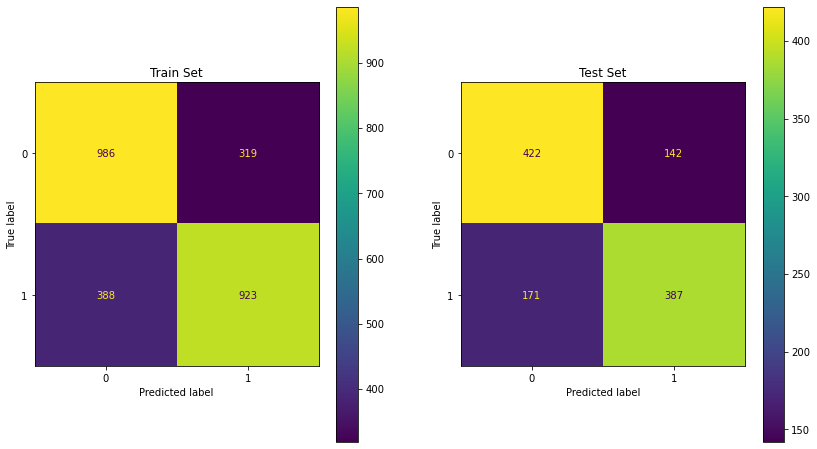

In [262]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [263]:
# After the upsampling we can see an improvement in Accuracy and Recall
#0	Accuracy	0.791684	0.766209
#1	Precision	0.656716	0.633333
#2	Recall	0.412823	0.38644

In [264]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.66221374, 0.6998088 , 0.70936902, 0.72466539, 0.7456979 ])

# Round 4 (Friday) 

## Fit a Random forest Classifier on the data and compare the accuracy.

In [272]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.735474006116208
0.7290552584670231


In [273]:
clf.predict_proba(X_test)

array([[0.61747908, 0.38252092],
       [0.48429173, 0.51570827],
       [0.35892749, 0.64107251],
       ...,
       [0.75762797, 0.24237203],
       [0.52496749, 0.47503251],
       [0.40968532, 0.59031468]])

In [274]:
clf.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1])

## Tune the hyper parameters with gridsearch and check the results.

In [275]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [277]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [278]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [279]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [280]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.32,0.01,0.02,0.00,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.75,0.78,0.78,0.77,0.80,0.78,0.02,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00
1,0.66,0.01,0.04,0.00,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.76,0.78,0.78,0.77,0.80,0.78,0.01,3,0.99,0.99,0.99,1.00,1.00,0.99,0.00
2,3.29,0.02,0.16,0.00,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.75,0.78,0.79,0.77,0.80,0.78,0.02,2,0.99,0.99,0.99,1.00,1.00,0.99,0.00
3,0.33,0.02,0.02,0.00,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.74,0.78,0.77,0.75,0.79,0.77,0.02,6,0.98,0.98,0.97,0.97,0.98,0.98,0.00
4,0.67,0.05,0.04,0.00,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.74,0.79,0.79,0.75,0.80,0.78,0.02,5,0.98,0.99,0.98,0.98,0.98,0.98,0.00
5,3.22,0.08,0.21,0.02,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.75,0.80,0.79,0.76,0.79,0.78,0.02,4,0.99,0.99,0.98,0.98,0.99,0.99,0.00
6,0.30,0.01,0.02,0.00,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.73,0.77,0.76,0.74,0.77,0.75,0.02,11,0.95,0.94,0.94,0.95,0.95,0.95,0.00
7,0.67,0.03,0.05,0.01,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.74,0.79,0.77,0.75,0.77,0.76,0.02,7,0.95,0.95,0.95,0.95,0.95,0.95,0.00
8,3.46,0.04,0.18,0.00,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.73,0.78,0.76,0.74,0.78,0.76,0.02,9,0.95,0.95,0.95,0.95,0.95,0.95,0.00
9,0.35,0.03,0.03,0.01,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.73,0.77,0.76,0.74,0.77,0.75,0.02,11,0.95,0.94,0.94,0.95,0.95,0.95,0.00


In [281]:
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7725483314322483
